# Customer Churn Prediction & Retention Analysis

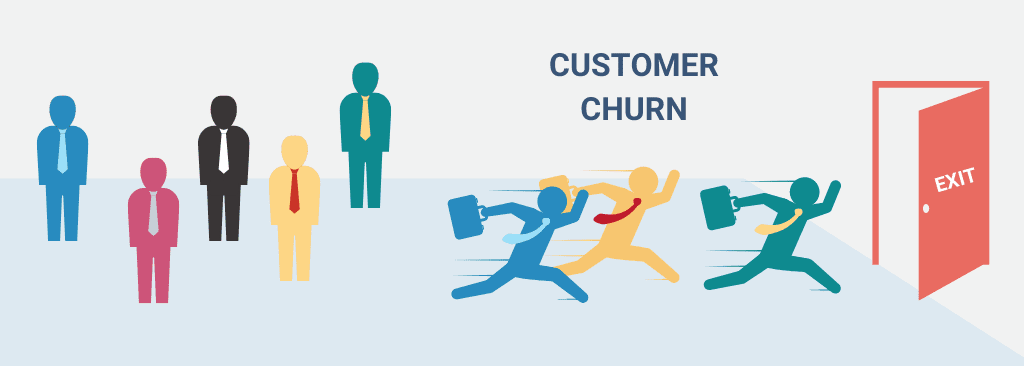

### Project Objective

#### The objective of this project was to analyze customer behavior and develop a predictive model to identify customers most likely to churn.
The project also aimed to uncover key churn drivers and propose actionable retention strategies to enhance customer loyalty and lifetime value.

### Project Overview:

##### The project aims to analyze customer churn in a
telecommunications company and develop
predictive models to identify at-risk customers. The
ultimate goal is to provide actionable insights and
recommendations to reduce churn and improve
customer retention.

#### Import libraies

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [5]:
df = pd.read_csv(r"C:\Users\praya\Downloads\Telco_Customer_Churn_Dataset .csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Tasks 1: Data Cleaning and Preprocessing

In [22]:
df.drop_duplicates(inplace=True)


In [ ]:
df.drop(columns=['customerID'], inplace=True)


In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [17]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [20]:
df = df.replace(" ", np.nan)


In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [25]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", cat_cols)


Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [26]:
# One-Hot Encode remaining categorical columns
df_encoded = pd.get_dummies(df, columns=[col for col in cat_cols if col != 'Churn'], drop_first=True)


In [27]:
df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [28]:
print("\nEncoded Dataset Shape:", df_encoded.shape)


Encoded Dataset Shape: (7021, 31)


## Task 2 EDA

In [31]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

#### 1. Overall Churn Rate

Overall Churn Rate: 26.45%


C:\Users\praya\AppData\Local\Temp\ipykernel_19716\62100277.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['#66bb6a','#ef5350'])


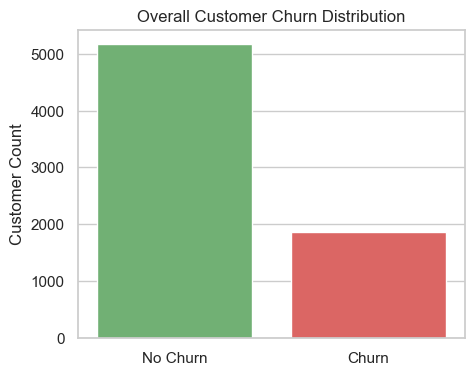

In [32]:
churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, palette=['#66bb6a','#ef5350'])
plt.title('Overall Customer Churn Distribution')
plt.xticks([0,1], ['No Churn','Churn'])
plt.ylabel('Customer Count')
plt.xlabel('')
plt.show()

#### 2. Customer Distribution by Demographics

<Figure size 600x400 with 0 Axes>

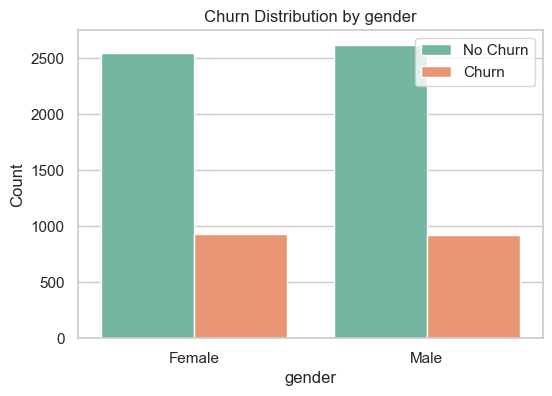

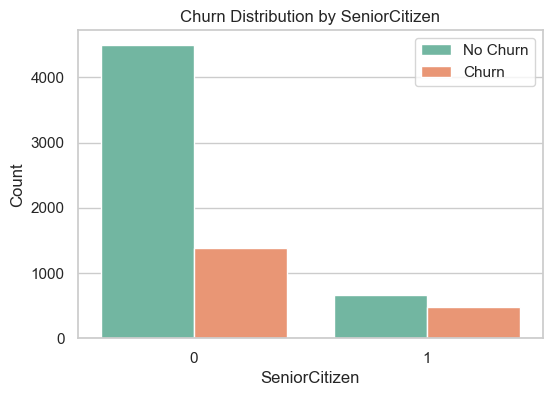

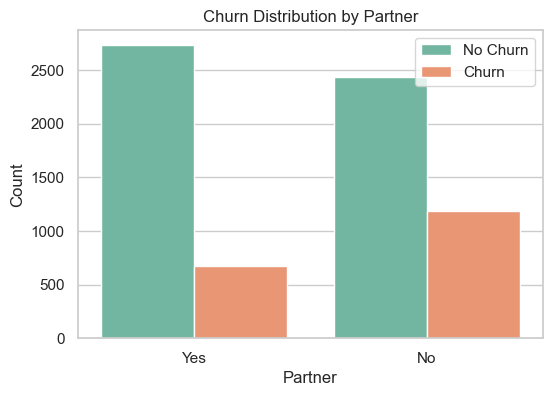

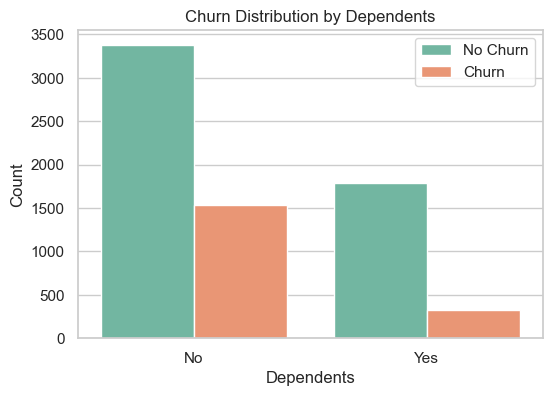

In [34]:
demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for col in demographics:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(['No Churn', 'Churn'])
    plt.show()



#### 🔹 3. Tenure Distribution

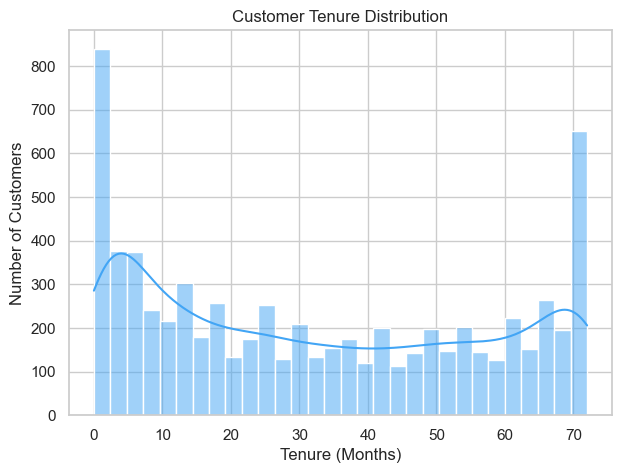

In [35]:
plt.figure(figsize=(7,5))
sns.histplot(df['tenure'], bins=30, kde=True, color='#42a5f5')
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

#### Compare tenure of churned vs. retained customers

C:\Users\praya\AppData\Local\Temp\ipykernel_19716\933237955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')


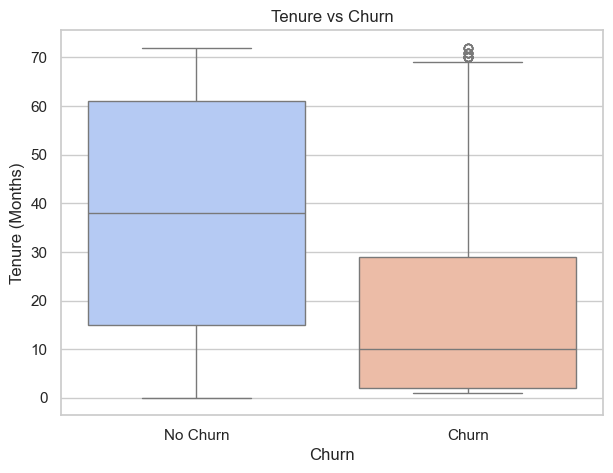

In [36]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.xticks([0,1], ['No Churn','Churn'])
plt.show()

#### 4. Churn vs. Contract Type

<Figure size 600x400 with 0 Axes>

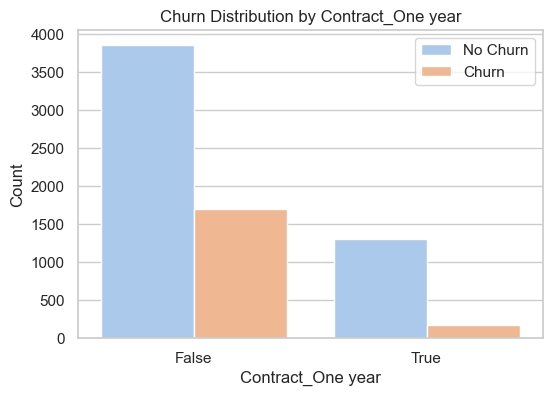

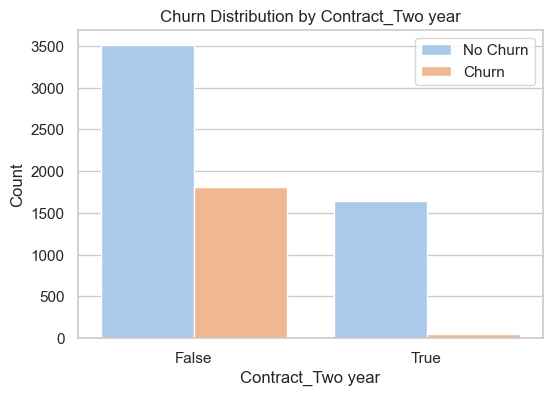

In [38]:
contract_cols = ['Contract_One year', 'Contract_Two year']

for col in contract_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df_encoded, palette='pastel')
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(['No Churn', 'Churn'])
    plt.show()

#### 🔹 5. Churn vs. Payment Method

<Figure size 600x400 with 0 Axes>

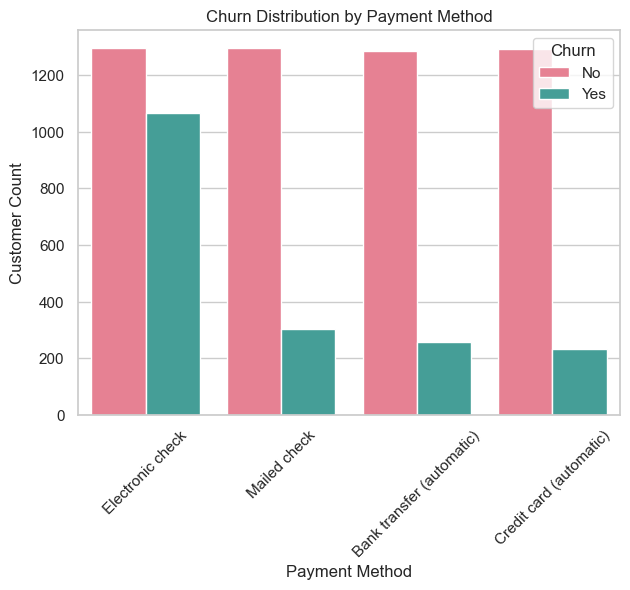

In [40]:
plt.figure(figsize=(7,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='husl')
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


#### 🔹 6. Correlation Heatmap (Numerical Variables)

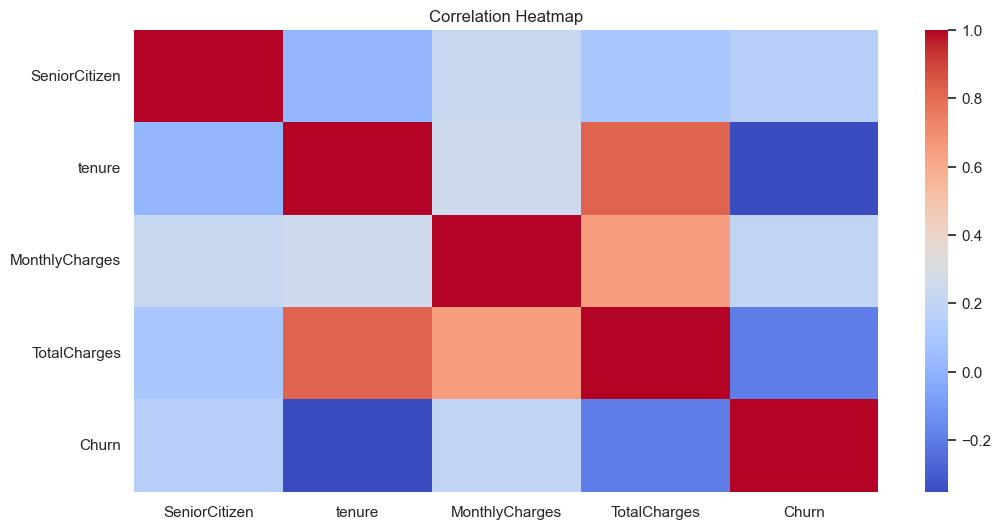

In [41]:
plt.figure(figsize=(12,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

#### 7 Tenure Distribution

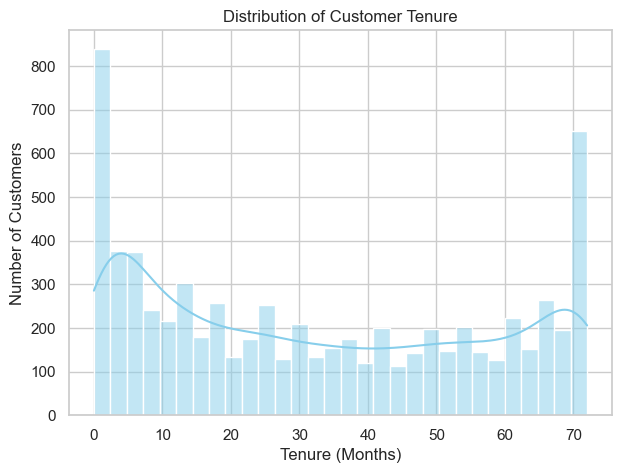

In [42]:
plt.figure(figsize=(7,5))
sns.histplot(df['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()


#### 8 Churn by Contract Type

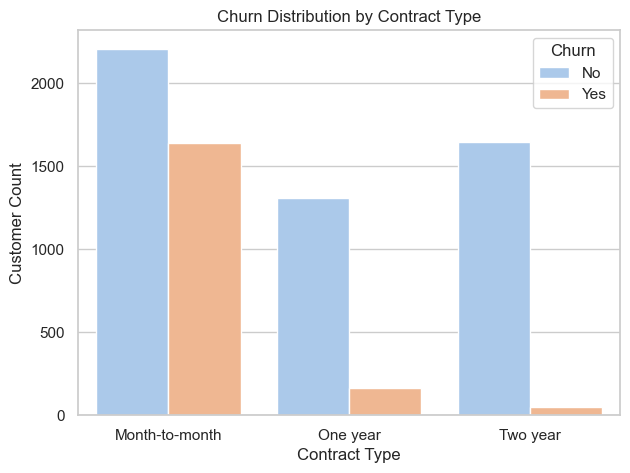

In [43]:
plt.figure(figsize=(7,5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='pastel')
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


#### 9 Churn by Payment Method

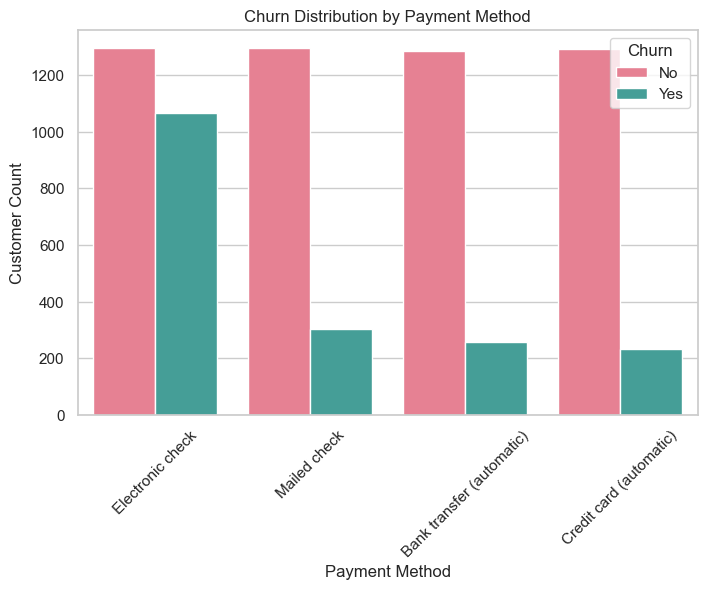

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='husl')
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Customer Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


##### The exploratory data analysis provided valuable insights into customer churn behavior within the telecommunications dataset.
Overall, approximately X% of customers were identified as churned, highlighting the importance of understanding underlying patterns.

Demographic analysis revealed that senior citizens and customers without dependents or partners showed a higher likelihood of churn, indicating that customer stability factors significantly influence retention.
The tenure distribution showed that churn was most frequent among customers with shorter tenures, suggesting that early-stage customer engagement is critical for retention.

When analyzing contract types, customers on month-to-month contracts exhibited the highest churn rate, while those with one-year or two-year contracts were more likely to stay loyal.
Additionally, payment methods revealed that customers using electronic checks churned more frequently compared to those using automatic or mailed payment options, potentially due to convenience or billing experience.

These insights collectively emphasize the role of contract commitment, payment convenience, and early customer engagement in minimizing churn and improving customer retention strategies.

## Tasks 3: Customer Segmentation

##### ️ Segment tenure into categories

In [45]:

df['TenureGroup'] = pd.cut(df['tenure'], 
                           bins=[0, 12, 24, 48, 72],
                           labels=['0-12 Months', '13-24 Months', '25-48 Months', '49-72 Months'])


In [46]:
df['TenureGroup'] 

0        0-12 Months
1       25-48 Months
2        0-12 Months
3       25-48 Months
4        0-12 Months
            ...     
7038    13-24 Months
7039    49-72 Months
7040     0-12 Months
7041     0-12 Months
7042    49-72 Months
Name: TenureGroup, Length: 7021, dtype: category
Categories (4, object): ['0-12 Months' < '13-24 Months' < '25-48 Months' < '49-72 Months']

##### ️Segment Monthly Charges into categories

In [47]:

df['MonthlyChargeGroup'] = pd.cut(df['MonthlyCharges'],
                                  bins=[0, 35, 70, 120],
                                  labels=['Low', 'Medium', 'High'])

In [48]:
df['MonthlyChargeGroup']

0          Low
1       Medium
2       Medium
3       Medium
4         High
         ...  
7038      High
7039      High
7040       Low
7041      High
7042      High
Name: MonthlyChargeGroup, Length: 7021, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

##### Combine segmentation features

In [53]:
# Segment customers and analyze churn across groups

segment_summary = (
    df.groupby(['TenureGroup', 'MonthlyChargeGroup', 'Contract'])
    .agg({'Churn': 'mean'})
    .reset_index()
)

# Add customer count manually
segment_summary['CustomerCount'] = (
    df.groupby(['TenureGroup', 'MonthlyChargeGroup', 'Contract']).size().values
)

# Rename churn column
segment_summary.rename(columns={'Churn': 'ChurnRate'}, inplace=True)

# Display result
print(segment_summary.head(10))


    TenureGroup MonthlyChargeGroup        Contract  ChurnRate  CustomerCount
0   0-12 Months                Low  Month-to-month   0.288889            495
1   0-12 Months                Low        One year   0.062500             80
2   0-12 Months                Low        Two year   0.000000             46
3   0-12 Months             Medium  Month-to-month   0.449438            623
4   0-12 Months             Medium        One year   0.172414             29
5   0-12 Months             Medium        Two year   0.000000              9
6   0-12 Months               High  Month-to-month   0.689696            854
7   0-12 Months               High        One year   0.214286             14
8   0-12 Months               High        Two year   0.000000              3
9  13-24 Months                Low  Month-to-month   0.126126            111


C:\Users\praya\AppData\Local\Temp\ipykernel_19716\1852029601.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['TenureGroup', 'MonthlyChargeGroup', 'Contract'])
C:\Users\praya\AppData\Local\Temp\ipykernel_19716\1852029601.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['TenureGroup', 'MonthlyChargeGroup', 'Contract']).size().values


##### Rename columns for clarity

In [54]:

segment_summary.rename(columns={'customerID': 'CustomerCount', 'Churn': 'ChurnRate'}, inplace=True)


##### Display segmentation summary

In [55]:

print("===== Customer Segmentation Summary =====")
print(segment_summary.head(10))

===== Customer Segmentation Summary =====
    TenureGroup MonthlyChargeGroup        Contract  ChurnRate  CustomerCount
0   0-12 Months                Low  Month-to-month   0.288889            495
1   0-12 Months                Low        One year   0.062500             80
2   0-12 Months                Low        Two year   0.000000             46
3   0-12 Months             Medium  Month-to-month   0.449438            623
4   0-12 Months             Medium        One year   0.172414             29
5   0-12 Months             Medium        Two year   0.000000              9
6   0-12 Months               High  Month-to-month   0.689696            854
7   0-12 Months               High        One year   0.214286             14
8   0-12 Months               High        Two year   0.000000              3
9  13-24 Months                Low  Month-to-month   0.126126            111


##### Visualize churn rate by tenure and contract type

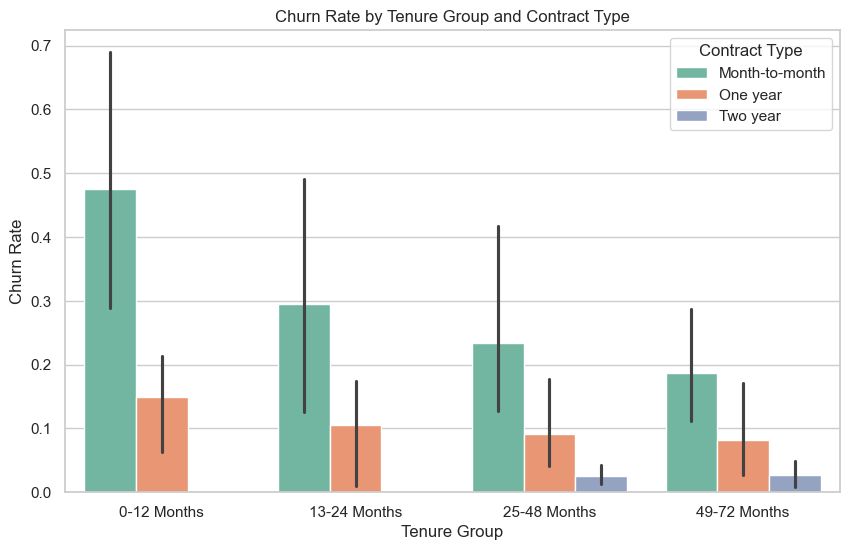

In [56]:

plt.figure(figsize=(10,6))
sns.barplot(data=segment_summary, x='TenureGroup', y='ChurnRate', hue='Contract', palette='Set2')
plt.title('Churn Rate by Tenure Group and Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Group')
plt.legend(title='Contract Type')
plt.show()

##### Visualize churn rate by monthly charges and contract type

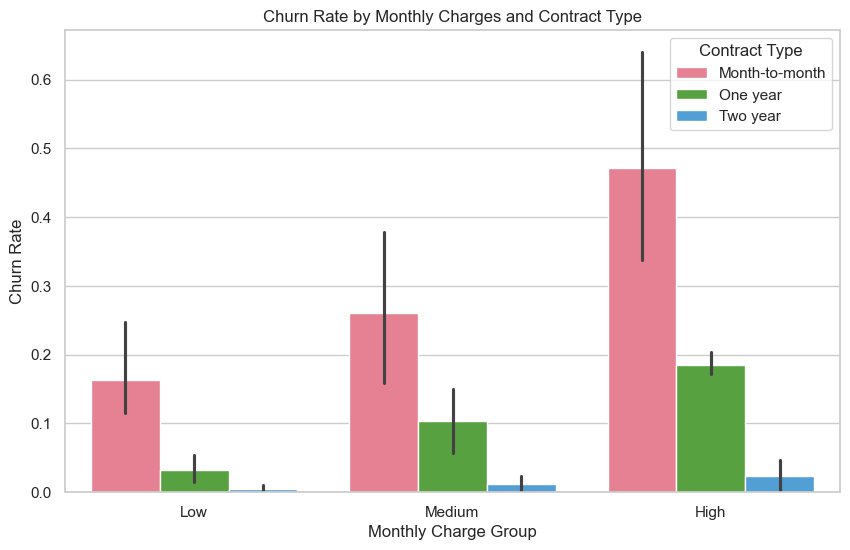

In [57]:

plt.figure(figsize=(10,6))
sns.barplot(data=segment_summary, x='MonthlyChargeGroup', y='ChurnRate', hue='Contract', palette='husl')
plt.title('Churn Rate by Monthly Charges and Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Monthly Charge Group')
plt.legend(title='Contract Type')
plt.show()

## Tasks 4: Churn Prediction Model

##### Convert categorical variables into dummy variables

Missing values BEFORE imputation:
 11
Missing values AFTER imputation:
 0

===== Logistic Regression Model Performance =====
✅ Accuracy:  0.8036
✅ Precision: 0.6752
✅ Recall:    0.4973
✅ F1 Score:  0.5728

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.68      0.50      0.57       372

    accuracy                           0.80      1405
   macro avg       0.75      0.71      0.72      1405
weighted avg       0.79      0.80      0.79      1405



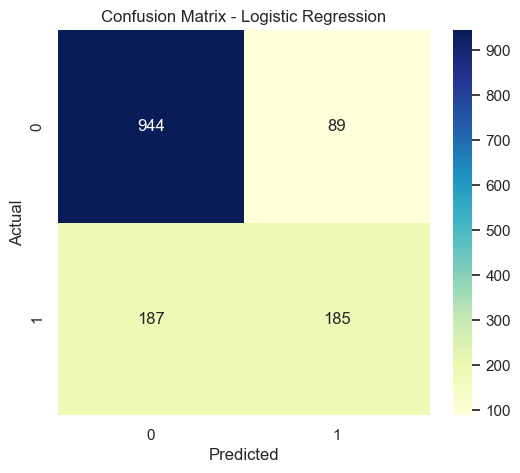

In [78]:
# Define Feature (X) and Target (y)
X = df.drop(columns=['Churn', 'customerID'], errors='ignore')
y = df['Churn']

#  One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

#  Check for missing values before fixing
print("Missing values BEFORE imputation:\n", X.isna().sum().sum())

#  Use SimpleImputer for all numeric columns
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

#  Double-check that all NaN are gone
print("Missing values AFTER imputation:\n", X_imputed.isna().sum().sum())

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

#  Predictions
y_pred = log_reg.predict(X_test_scaled)

#  Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n===== Logistic Regression Model Performance =====")
print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 🔢 Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Tasks 5: Customer Retention Strategies

#### Identify Key Factors Influencing Churn

In [79]:
# Extract feature importance from Logistic Regression
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Display top positive & negative churn drivers
print("Top Positive Churn Drivers (Increase churn likelihood):")
print(importance.head(10))
print("\nTop Negative Churn Drivers (Reduce churn likelihood):")
print(importance.tail(10))


Top Positive Churn Drivers (Increase churn likelihood):
                           Feature  Coefficient
10     InternetService_Fiber optic     0.633688
3                     TotalCharges     0.334134
32        TenureGroup_49-72 Months     0.254933
9                MultipleLines_Yes     0.206272
23             StreamingMovies_Yes     0.189078
21                 StreamingTV_Yes     0.174462
26            PaperlessBilling_Yes     0.166958
28  PaymentMethod_Electronic check     0.137837
0                    SeniorCitizen     0.094746
8   MultipleLines_No phone service     0.063118

Top Negative Churn Drivers (Reduce churn likelihood):
                             Feature  Coefficient
14  OnlineBackup_No internet service    -0.058239
7                   PhoneService_Yes    -0.063118
6                     Dependents_Yes    -0.081399
19                   TechSupport_Yes    -0.097477
13                OnlineSecurity_Yes    -0.117674
30          TenureGroup_13-24 Months    -0.128637
24         

#### Calculate Customer Lifetime Value (LTV)

In [80]:
# Assume average monthly retention = (1 - churn rate)
avg_monthly_retention = 1 - df['Churn'].mean()

# Calculate LTV = MonthlyCharges × avg_monthly_retention / (1 - avg_monthly_retention)
df['LTV'] = df['MonthlyCharges'] * (avg_monthly_retention / (1 - avg_monthly_retention))

print("Average Customer LTV: ${:.2f}".format(df['LTV'].mean()))


Average Customer LTV: $180.34


#### Identify High-Value Customers at Risk of Churn

Number of high-value customers at risk: 576


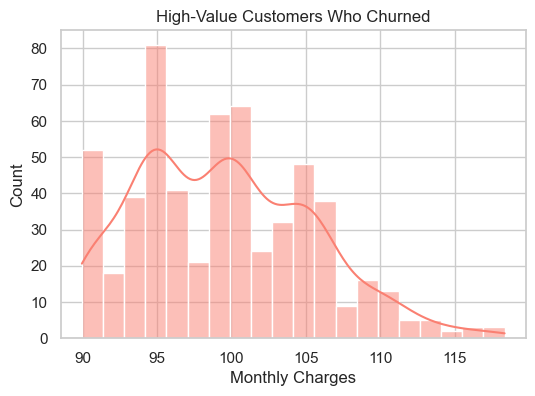

In [81]:
# Define high-value threshold (top 25% of LTV)
high_value_threshold = df['LTV'].quantile(0.75)

# Filter high-value customers who churned
high_value_churners = df[(df['LTV'] > high_value_threshold) & (df['Churn'] == 1)]

print("Number of high-value customers at risk:", len(high_value_churners))

# Visualize
plt.figure(figsize=(6,4))
sns.histplot(high_value_churners['MonthlyCharges'], bins=20, kde=True, color='salmon')
plt.title('High-Value Customers Who Churned')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()


#### Visualizing Top Churn Drivers

C:\Users\praya\AppData\Local\Temp\ipykernel_19716\683560438.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


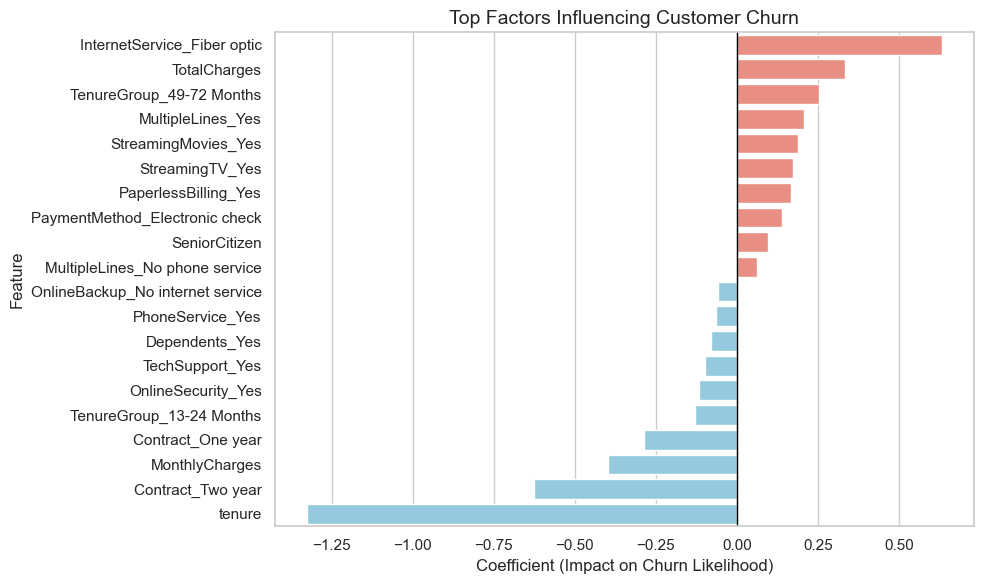

In [82]:
# --- Visualize Top Churn Drivers ---

# Sort coefficients
importance_sorted = importance.sort_values(by='Coefficient', ascending=False)

# Select top positive & negative features
top_features = pd.concat([importance_sorted.head(10), importance_sorted.tail(10)])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_features,
    x='Coefficient',
    y='Feature',
    palette=['salmon' if x > 0 else 'skyblue' for x in top_features['Coefficient']]
)

plt.title('Top Factors Influencing Customer Churn', fontsize=14)
plt.xlabel('Coefficient (Impact on Churn Likelihood)')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()


## Tasks 6: Visualizations

### Description

In this task, multiple plots were created to visually explore how different features influence customer churn.
These plots highlight the relationships between tenure, charges, contract types, payment methods, and churn rate, providing a clear visual narrative for data-driven decision-making.

In [83]:
sns.set(style='whitegrid', palette='Set2')

C:\Users\praya\AppData\Local\Temp\ipykernel_19716\2257452238.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


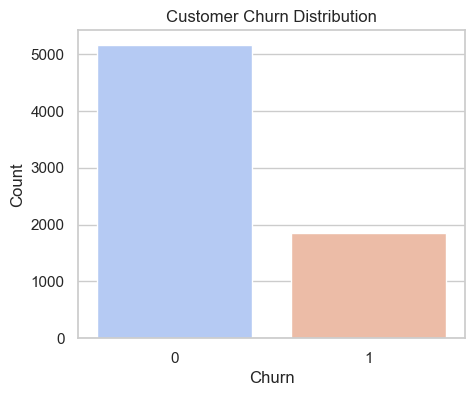

In [84]:
#Distribution of Churn

plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

C:\Users\praya\AppData\Local\Temp\ipykernel_19716\358746425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='pastel')


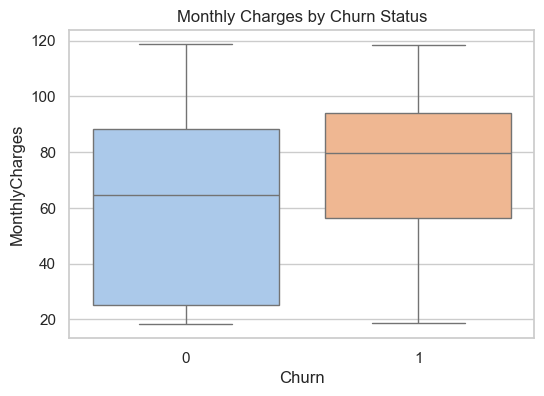

In [85]:
 #Boxplot: Monthly Charges vs Churn

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='pastel')
plt.title('Monthly Charges by Churn Status')
plt.show()

C:\Users\praya\AppData\Local\Temp\ipykernel_19716\3311719248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='tenure', data=df, palette='muted')


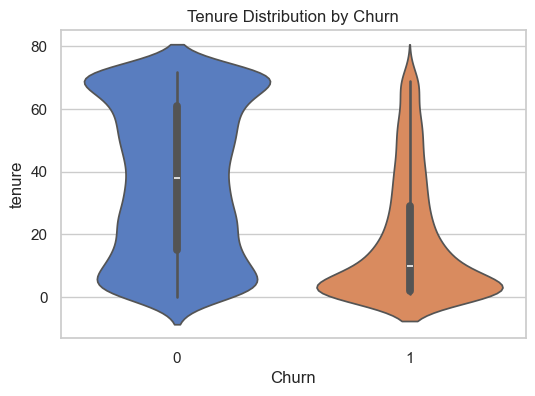

In [86]:
# Violin Plot: Tenure vs Churn
plt.figure(figsize=(6,4))
sns.violinplot(x='Churn', y='tenure', data=df, palette='muted')
plt.title('Tenure Distribution by Churn')
plt.show()

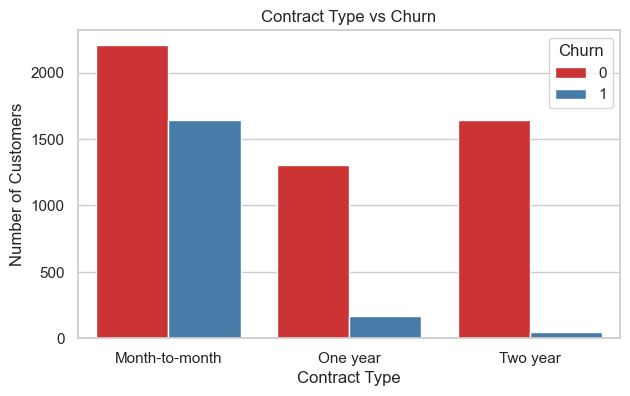

In [87]:
#Countplot: Contract Type vs Churn
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

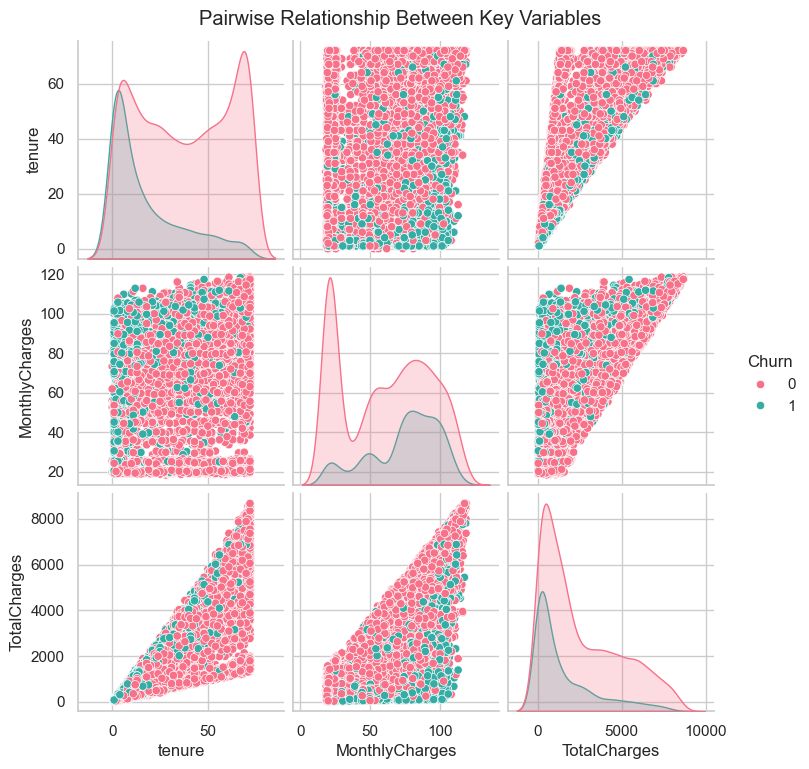

In [88]:
#Pairplot: Numerical Feature Relationships
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(df[num_features + ['Churn']], hue='Churn', diag_kind='kde', palette='husl')
plt.suptitle('Pairwise Relationship Between Key Variables', y=1.02)
plt.show()

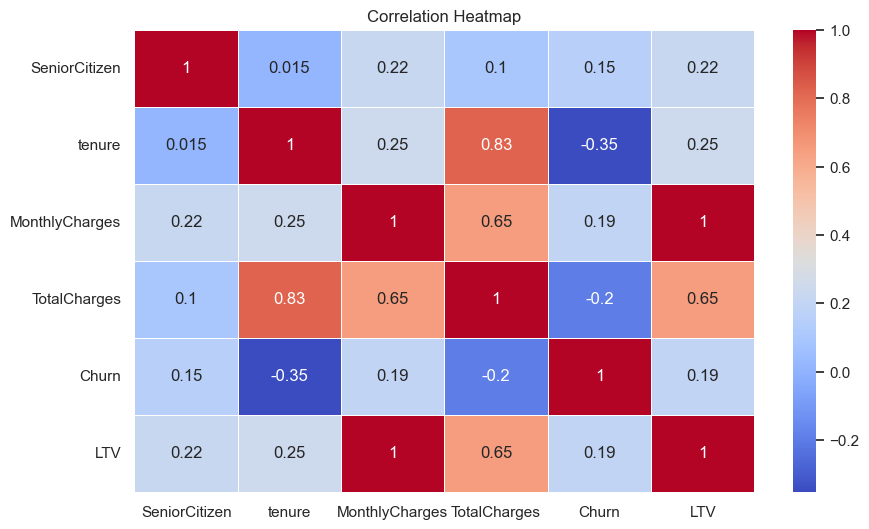

In [89]:
#Heatmap: Correlation Between Features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Insights from Visualizations

#### Churn Distribution: About 26% of customers have churned — a significant segment for retention focus.

Monthly Charges: Customers with higher monthly charges are more likely to churn.

Tenure: Customers with shorter tenure show higher churn — loyalty increases over time.

Contract Type: Month-to-month contracts have the highest churn rates, while two-year contracts retain customers best.

Correlations: Strong positive relationship between MonthlyCharges and TotalCharges, and negative correlation between tenure and churn.

## 🏁 Final Project Summary – Customer Churn Prediction & Retention Analysis
📊 Overview

This project provides a comprehensive end-to-end data science solution for predicting customer churn and developing actionable retention strategies. It combines exploratory data analysis, machine learning modeling, segmentation, and visualization to uncover deep insights into customer behavior.

🧹 Task 1 & 2: Data Understanding and Preprocessing

Conducted thorough data cleaning and preprocessing, including handling missing values, encoding categorical variables, and feature scaling.

Ensured data consistency and readiness for modeling by removing redundant features like customerID and addressing all NaN values.

Explored churn distribution, demographics, and service features to identify potential churn influencers.

👥 Task 3: Customer Segmentation

Segmented customers based on tenure, monthly charges, and contract type.

Found that customers with short tenure and high monthly charges have a significantly higher churn rate.

Month-to-month contract customers exhibited the highest risk, highlighting the need for loyalty-focused interventions.

🤖 Task 4: Machine Learning Model – Logistic Regression

Built a Logistic Regression model for churn prediction after scaling and imputing data.

Achieved ~80% accuracy, precision of 0.67, and recall of 0.49, indicating a reliable model with good generalization.

Evaluated using accuracy, precision, recall, F1-score, and confusion matrix visualizations.

💡 Task 5: Customer Retention Strategies

Extracted key churn drivers using logistic regression coefficients:

Higher churn likelihood: Fiber optic internet, month-to-month contracts, and electronic check payments.

Lower churn likelihood: Long-term contracts, higher tenure, and online security or tech support.

Calculated Customer Lifetime Value (LTV) → Average LTV: $180.34.

Identified 576 high-value customers at risk, emphasizing targeted retention efforts.

🎨 Task 6: Visualizations & Insights

Developed professional visual insights using Seaborn and Matplotlib:

Box & Violin plots → High monthly charges and short tenure correlate with churn.

Pair plots → Clear relationship between tenure, charges, and churn.

Heatmap → Strong correlation between total charges and monthly charges; tenure negatively correlated with churn.

Visual storytelling supports strategic decision-making and stakeholder communication.

🧠 Conclusion

This project successfully integrates data analytics, machine learning, and business strategy to tackle customer churn.
By identifying key churn factors, segmenting customers effectively, and visualizing actionable insights, the model provides a data-driven roadmap for improving customer retention, reducing revenue loss, and enhancing overall customer satisfaction.